<a href="https://colab.research.google.com/github/Acedportugas/N-Body-Simulation/blob/main/N_Body_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import random
import matplotlib.pyplot as plt
from IPython.display import HTML
from matplotlib import animation,rc
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import warnings

In [ ]:
class position:
    def __init__(self,x,y,z):
        self.x = x
        self.y = y
        self.z = z  
        
class body:
    def __init__(self,location,mass,velocity,name=""):
        self.location = location
        self.mass = mass
        self.velocity = velocity
        self.name = name

def partial_step(point1, point2, time_step):
    ret = position(0,0,0)
    ret.x = point1.x + point2.x * time_step
    ret.y = point1.y + point2.y * time_step
    ret.z = point1.z + point2.z * time_step
    return ret


In [ ]:

class RK4_integrator:
    def __init__(self, time_step, bodies):
        self.time_step = time_step
        self.bodies = bodies


    def calculate_1_body_acc(self,body_index):
        G_const = 6.67408e-11
        acceleration = position(0,0,0)
        target_body = self.bodies[body_index]

        k1 = position(0,0,0)
        k2 = position(0,0,0)
        k3 = position(0,0,0)
        k4 = position(0,0,0)
        tmp_loc = position(0,0,0)
        tmp_vel = position(0,0,0)

        for index,external_body in enumerate(bodies):
            if index != body_index:
                r = (target_body.location.x - external_body.location.x)**2 + (target_body.location.y - external_body.location.y)**2+ (target_body.location.z - external_body.location.z)**2+0.01**2
                r = math.sqrt(r)
                tmp = (G_const * external_body.mass) / r**3


                k1.x = tmp * (external_body.location.x - target_body.location.x)
                k1.y = tmp * (external_body.location.y - target_body.location.y)
                k1.z = tmp * (external_body.location.z - target_body.location.z)

                tmp_vel = partial_step(target_body.velocity, k1, 0.5)
                tmp_loc = partial_step(target_body.location, tmp_vel, 0.5 )
                
                k2.x = (external_body.location.x - tmp_loc.x) * tmp
                k2.y = (external_body.location.y - tmp_loc.y) * tmp
                k2.z = (external_body.location.z - tmp_loc.z) * tmp

                tmp_vel = partial_step(target_body.velocity, k2, 0.5)
                
                k3.x = (external_body.location.x - tmp_loc.x) * tmp
                k3.y = (external_body.location.y - tmp_loc.y) * tmp
                k3.z = (external_body.location.z - tmp_loc.z) * tmp


                           
                tmp_vel = partial_step(target_body.velocity, k3, 1)
                tmp_loc = partial_step(target_body.location, tmp_vel,0.5)

                k4.x = (external_body.location.x - tmp_loc.x) * tmp;
                k4.y = (external_body.location.y - tmp_loc.y) * tmp;
                k4.z = (external_body.location.z - tmp_loc.z) * tmp;



                acceleration.x += (k1.x + k2.x * 2 + k3.x * 2 + k4.x) / 6;
                acceleration.y += (k1.y + k2.y * 2 + k3.y * 2 + k4.y) / 6;
                acceleration.z += (k1.z + k2.z * 2 + k3.z * 2 + k4.z) / 6;

        return acceleration

    def compute_velocity(self):
        for body_index , target_body in enumerate(self.bodies):
            acceleration = self.calculate_1_body_acc(body_index)
        
            target_body.velocity.x += acceleration.x*self.time_step
            target_body.velocity.y += acceleration.y*self.time_step
            target_body.velocity.z += acceleration.z*self.time_step

    def update_location(self):
        for target_body in self.bodies:
            target_body.location.x += target_body.velocity.x*self.time_step
            target_body.location.y += target_body.velocity.y*self.time_step
            target_body.location.z += target_body.velocity.z*self.time_step

    def compute_gravity_step(self):
            self.compute_velocity()
            self.update_location()
     

In [ ]:
def update(ifrm):
     for r in range(0,no_body):
        globals()['a'+ str(r)] =  globals()["x_" + str(r)][ifrm]
        globals()['b'+ str(r)] =  globals()["y_" + str(r)][ifrm]
        globals()['c'+ str(r)] =  globals()["z_" + str(r)][ifrm]

        globals()['sct'+ str(r)].set_data(globals()['a'+ str(r)],globals()['b'+ str(r)])
        globals()['sct'+ str(r)].set_3d_properties(globals()['c'+ str(r)])

        globals()['line'+ str(r)].set_data(globals()["x_" + str(r)][:ifrm],globals()["y_" + str(r)][:ifrm])
        globals()['line'+ str(r)].set_3d_properties(globals()["z_" + str(r)][:ifrm])

In [ ]:
def plot_system(bodies):
    #ax = fig.subplots(1)
    x_max =np.zeros(no_body+1)
    y_max =np.zeros(no_body+1)
    x_min =np.zeros(no_body+1)
    y_min =np.zeros(no_body+1)

    max_range = 0

    for index , current_body in enumerate(bodies):
        max_dim = max(max(current_body["x"]),max(current_body["y"]),max(current_body["z"]))

        if max_dim > max_range:
            globals()["x_" + str(index)] = current_body['x']
            globals()["y_" + str(index)]= current_body['y']
            globals()["z_" + str(index)]= current_body['z']
            #ax.plot(globals()["x_" + str(index)], globals()["y_" + str(index)],globals()["z_" + str(index)], c =  random.choice(colours), label = current_body["name"])




    l = int(input('1:3d static plot\n2:animated 3d plot\n3:both\n'))

    if l == 1:

        fig = plt.figure(figsize=(10,5))
        colours = ['r','b','g','y','m','c']
        ax = fig.add_subplot(1,1,1, projection='3d')
        for index in range(no_body):
            ax.plot(globals()["x_" + str(index)], globals()["y_" + str(index)],globals()["z_" + str(index)], c =  random.choice(colours), label = current_body["name"])
        plt.show()
        ax.legend() 

        return

    if l == 2:

        fig = plt.figure(figsize=(15,10))

        x_max =np.zeros(no_body)
        y_max =np.zeros(no_body)



        x_min =np.zeros(no_body)
        y_min =np.zeros(no_body)


        for i  in range(0,no_body):
            x_max[i]=max(globals()["x_" + str(i)])
            y_max[i]=max(globals()["y_" + str(i)])
        

            x_min[i]=min(globals()["x_" + str(i)])
            y_min[i]=min(globals()["y_" + str(i)])
        



        ax = fig.add_subplot(111, projection='3d',xlim=(min(x_min),max(x_max)),ylim=(min(y_min),max(y_max)),zlim=(0,0.1))
        ax.set_zticks(np.arange(-0.04, 0.04, 0.02))



        for r in range(0,no_body):
            globals()['sct'+ str(r)]= i
            globals()['sct'+ str(r)],=ax.plot([],[],[],'o',markersize=6)
            globals()['line'+ str(r)]= i
            globals()['line'+ str(r)],=ax.plot([],[],[],'-',lw=1)

        nfr = len(x_0)

        def update(ifrm):
            for r in range(0,no_body):
                globals()['a'+ str(r)] =  globals()["x_" + str(r)][ifrm]
                globals()['b'+ str(r)] =  globals()["y_" + str(r)][ifrm]
                globals()['c'+ str(r)] =  globals()["z_" + str(r)][ifrm]

                globals()['sct'+ str(r)].set_data(globals()['a'+ str(r)],globals()['b'+ str(r)])
                globals()['sct'+ str(r)].set_3d_properties(globals()['c'+ str(r)])

                globals()['line'+ str(r)].set_data(globals()["x_" + str(r)][:ifrm],globals()["y_" + str(r)][:ifrm])
                globals()['line'+ str(r)].set_3d_properties(globals()["z_" + str(r)][:ifrm])

        ani = animation.FuncAnimation(fig, update, nfr, interval=50)

        plt.rcParams['animation.html'] = 'html5'
        ani

        return ani

    if l == 3:
        fig = plt.figure(figsize=(15,10))
        #fig,(ax1,ax2) = plt.subplot(2,1,projection='3d')
        colours = ['r','b','g','y','m','c']
        ax1 = fig.add_subplot(1,1,1,projection='3d')
        for index in range(no_body):
            ax1.plot(globals()["x_" + str(index)], globals()["y_" + str(index)],globals()["z_" + str(index)], c =  random.choice(colours), label = current_body["name"])
        
        plt.show() 

        x_max =np.zeros(no_body)
        y_max =np.zeros(no_body)



        x_min =np.zeros(no_body)
        y_min =np.zeros(no_body)


        for i  in range(0,no_body):
            x_max[i]=max(globals()["x_" + str(i)])
            y_max[i]=max(globals()["y_" + str(i)])
        

            x_min[i]=min(globals()["x_" + str(i)])
            y_min[i]=min(globals()["y_" + str(i)])
        



        ax2 = fig.add_subplot(111, projection='3d',xlim=(min(x_min),max(x_max)),ylim=(min(y_min),max(y_max)),zlim=(0,0.1))
        ax2.set_zticks(np.arange(-0.04, 0.04, 0.02))



        for r in range(0,no_body):
            globals()['sct'+ str(r)]= i
            globals()['sct'+ str(r)],=ax2.plot([],[],[],'o',markersize=6)
            globals()['line'+ str(r)]= i
            globals()['line'+ str(r)],=ax2.plot([],[],[],'-',lw=1)

        nfr = len(x_0)

        def update(ifrm):
            for r in range(0,no_body):
                globals()['a'+ str(r)] =  globals()["x_" + str(r)][ifrm]
                globals()['b'+ str(r)] =  globals()["y_" + str(r)][ifrm]
                globals()['c'+ str(r)] =  globals()["z_" + str(r)][ifrm]

                globals()['sct'+ str(r)].set_data(globals()['a'+ str(r)],globals()['b'+ str(r)])
                globals()['sct'+ str(r)].set_3d_properties(globals()['c'+ str(r)])

                globals()['line'+ str(r)].set_data(globals()["x_" + str(r)][:ifrm],globals()["y_" + str(r)][:ifrm])
                globals()['line'+ str(r)].set_3d_properties(globals()["z_" + str(r)][:ifrm])

        ani = animation.FuncAnimation(fig, update, nfr, interval=50)

        plt.rcParams['animation.html'] = 'html5'
        ani




    return ani                                   


In [ ]:
def run_simulation(integrator, names = None, number_of_steps = 10000, report_freq = 100):
    body_locations_hist = []
    for current_body in bodies:
        body_locations_hist.append({"x":[], "y":[], "z":[], "name":current_body.name})
    
    
    for i in range(1,int(number_of_steps)):
        integrator.compute_gravity_step()     
        
        if i % report_freq == 0:
            for index, body_location in enumerate(body_locations_hist):
                body_location["x"].append(bodies[index].location.x)
                body_location["y"].append(bodies[index].location.y)           
                body_location["z"].append(bodies[index].location.z)   
                
    return body_locations_hist

In [ ]:


sun = {"location":position(0,0,0), "mass":2e30, "velocity":position(0,0,0)}



In [ ]:
def create_bodies(no_body):
    for i in range(0,no_body):
        
        globals()["Particle_" + str(i)] = np.empty(7,dtype=float)
        

        x= np.random.uniform(0,0)
        y = np.arange(1e11,7e11,1e10)
        y = np.random.choice(y)
        z = np.random.uniform(0,0)
        
        
        x_v= np.random.uniform(4748,24000)
        y_v = np.random.uniform(474,2400)
        z_v = np.random.uniform(0,0)
        
        mass = 1000
        
        
        globals()["Particle_" + str(i)]= {"location":position(x,y,z),"mass":mass,"velocity":position(x_v,y_v,z_v)}
        
          

    return


In [ ]:
no_body = int(input('Enter number of particles.[10 is suggested]:\n'))
#no_body = 10
create_bodies(no_body)  

bodies=[]
for i in range(no_body):
    bodies += [body(location= globals()["Particle_" + str(i)]['location'],mass=globals()["Particle_" + str(i)]['mass'],velocity=globals()["Particle_" + str(i)]['velocity'])]
bodies+= [body( location = sun["location"], mass = sun["mass"], velocity = sun["velocity"], name = "sun")]


Enter number of particles.[10 is suggested]:
10


1:3d static plot
2:animated 3d plot
3:both
3


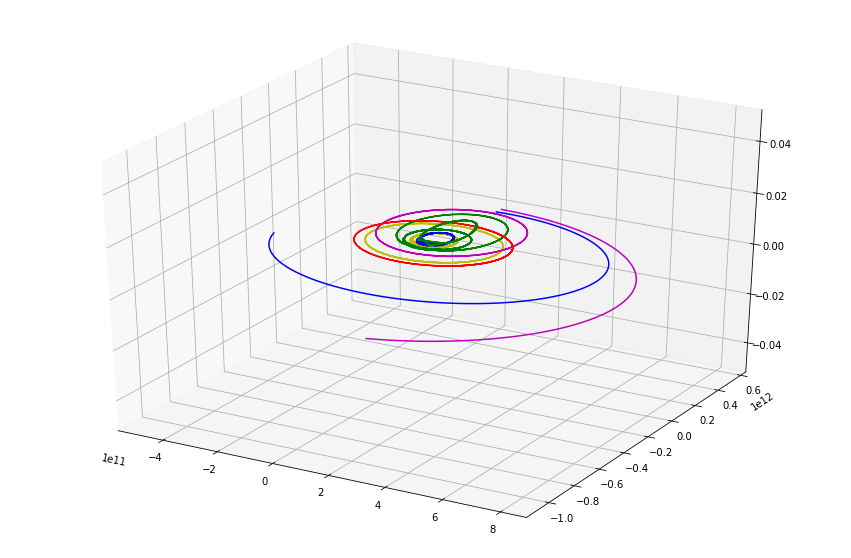

In [ ]:
%matplotlib inline

integrator = RK4_integrator(time_step = 18000, bodies = bodies)
motions = run_simulation(integrator, number_of_steps = 1e4, report_freq = 1e2)
plot_system(motions)


